## Task # 09:
- This is Task 9 overall and Task # 03 of week 3
### Task # 03:

In [7]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 

#### Task # 2.1:
- Load a dataset (e.g., the Boston Housing dataset from Scikit-Learn) and prepare the data for linear regression (e.g., split into training and testing sets).

In [8]:
#importing the dataset from my local machine
file_path = 'HousingData.csv'
Boston_df = pd.read_csv(file_path)
Boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [9]:
#first of all lets do some data pre processing
Boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
#we see that there are columns with null values , now lets check the data types
Boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
#so data types are ok now lets proceed to handle those missing values 
# List of column names to process
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Iterate through the list of columns
for column in columns:
    # Calculate the average value for the current column
    average_value = Boston_df[column].astype('float').mean(axis=0)
    
    # Replace NaN values with the average value
    Boston_df[column] = Boston_df[column].replace(np.nan, average_value)

In [12]:
# Check if there are any remaining Null values in each column
isnull_counts = Boston_df[columns].isnull().sum()
print(isnull_counts)

CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64


In [13]:
#training and testing
Boston_df_target = pd.DataFrame()
Boston_df_target['Price'] = Boston_df['MEDV']
# Boston_df.drop(['MEDV'],axis=1,inplace=True)
X = Boston_df.iloc[:,0:13]
y = Boston_df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Task # 2.2:
- Implement linear regression using Scikit-Learn. Fit the model to the training data

In [14]:
# Creating and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Task # 2.3:
-  Predict the target variable for the test set using the fitted linear regression model.

In [15]:
# Predicting the target variable for the test set
y_pred = model.predict(X_test)

#### Task # 2.4:
- Calculate the Mean Squared Error (MSE) of the linear regression model on the test 
set

In [16]:
# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 25.0177


#### Task # 2.5:
- Calculate the R-squared value of the linear regression model on the test set

In [17]:
# Calculating R-squared value
r2_score = model.score(X_test, y_test)
print(f'R-squared value: {r2_score:.4f}')

R-squared value: 0.6589


#### Task # 2.6:
-  Plot the regression line along with the actual data points to visually assess the model's 
performance

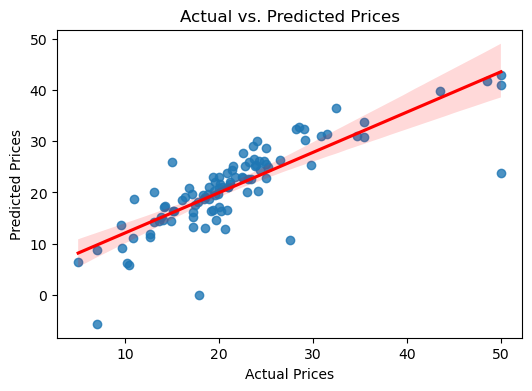

In [24]:
# Ensure y_test and y_pred are 1-dimensional
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# Creating a DataFrame for the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(6,4))

# Plot the regression line with actual vs. predicted values
sns.regplot(x='Actual', y='Predicted', data=results, line_kws={"color": "red"})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

#### Task # 2.7:
- Evaluate the model's performance by comparing the predicted values with the actual 
values. Create a scatter plot of the predicted vs. actual values.

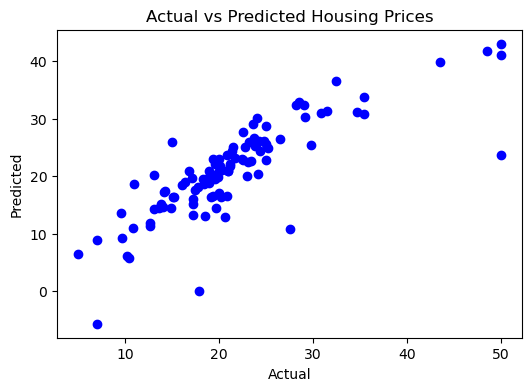

In [38]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

On the basis of above scatter plot we can see that there exist a positive correlation , but there are some minor values that are away from the ideal linear path , but majority of our prediction shows that there exist a good positive coorelation 

#### Task # 2.8:
- Interpret the coefficients of the linear regression model. Explain the impact of each
feature on the target variable

In [42]:
# Coefficients of the linear regression model
coefficients = model.coef_
features = Boston_df.iloc[:,0:13].columns
co_eff_df = pd.DataFrame()
co_eff_df['Feature'] = features
co_eff_df['Co efficient'] = coefficients[0]
co_eff_df.head(13)


,Feature,Co efficient
0,CRIM,-0.114140
1,ZN,0.029016
2,INDUS,-0.027133
3,CHAS,3.240673
4,NOX,-16.017543
5,RM,4.752410
6,AGE,-0.019520
7,DIS,-1.521593
8,RAD,0.222823
9,TAX,-0.009151


### Interpretation:
#### Coefficients:
- Each coefficient (model.coef_) represents the estimated change in the target variable (MEDV) for a one-unit increase in the corresponding predictor variable, holding all other predictors constant.
#### Direction of Impact:
- Positive Coefficient: If a coefficient is positive (e.g., 4.752 for RM), it indicates that as the value of that feature increases, the predicted housing price (MEDV) tends to increase as well. For instance, a one-unit increase in RM (average number of rooms per dwelling) is associated with an increase in MEDV by 4.752 units.
- Negative Coefficient: Conversely, a negative coefficient (e.g., -0.114 for CRIM) suggests that as the value of that feature increases, the predicted housing price (MEDV) tends to decrease. For example, a one-unit increase in CRIM (per capita crime rate by town) is associated with a decrease in MEDV by -0.114 units.
#### Magnitude of Impact:
- The magnitude of the coefficient indicates the strength of the relationship. Larger coefficients (either positive or negative) suggest a stronger influence of that feature on the predicted housing prices (MEDV), while smaller coefficients indicate a weaker influence.

| Feature  | Coefficient | Interpretation |
|----------|-------------|----------------|
| CRIM     | -0.114      | Increase in per capita crime rate is associated with a decrease in predicted housing price (`MEDV`). |
| ZN       | 0.029       | Increase in proportion of residential land zoned for large plots is associated with a slight increase in predicted housing price (`MEDV`). |
| INDUS    | -0.027      | Increase in proportion of non-retail business acres per town is associated with a decrease in predicted housing price (`MEDV`). |
| CHAS     | 3.241       | Being near the Charles River (CHAS=1) is associated with an increase in predicted housing price (`MEDV`). |
| NOX      | -16.018     | Increase in nitric oxides concentration (parts per 10 million) is associated with a significant decrease in predicted housing price (`MEDV`). |
| RM       | 4.752       | Increase in average number of rooms per dwelling is associated with an increase in predicted housing price (`MEDV`). |
| AGE      | -0.020      | Increase in proportion of owner-occupied units built before 1940 is associated with a slight decrease in predicted housing price (`MEDV`). |
| DIS      | -1.522      | Increase in weighted distances to five Boston employment centers is associated with a decrease in predicted housing price (`MEDV`). |
| RAD      | 0.223       | Better accessibility to radial highways is associated with a slight increase in predicted housing price (`MEDV`). |
| TAX      | -0.009      | Increase in full-value property tax rate per $10,000 is associated with a slight decrease in predicted housing price (`MEDV`). |
| PTRATIO  | -0.886      | Increase in pupil-teacher ratio by town is associated with a decrease in predicted housing price (`MEDV`). |
| B        | 0.012       | Increase in proportion of blacks by town is associated with a slight increase in predicted housing price (`MEDV`). |
| LSTAT    | -0.438      | Increase in percentage of lower status population (LSTAT) is associated with a decrease in predicted housing price (`MEDV`). |
